In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual,Layout
from tqdm.notebook import tnrange,tqdm
from flask import Response
from datetime import datetime
from pprint import pprint
import requests as r
import time
import json
import pandas as pd
import requests, json
import datetime as dt
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
class Web_Scarpping:
    def __init__(self,f):
        self.f=f
    def scrapper(self):
        html=requests.get(self.f)
        html1=html.content
        soup=BeautifulSoup(html1,"html.parser")
        anchors = soup.find_all('a')
        #print(anchors)
        all_links=set()
        # get all required links
        for link in anchors:
            a=link.get('href')
            if(link.get('href')!='#' and link.get('href')!=None and a[-2:]=="en" ):
                if len(a)==11:
                    linktext="https://opentender.eu"+link.get("href")
                    all_links.add(linktext)
        all_links_list=list(all_links)
        print(all_links_list,len(all_links_list))
        data={}
        i=1
        for lk in all_links_list:
            country_code=lk[-10:-8]

            url=requests.get(lk)
            url1=url.content
            soup=BeautifulSoup(url1,"html.parser")
            country_name=soup.find("span",class_="header-logo-brand_country").text
            action_postURL="https://opentender.eu/api/"+country_code+"/home/stats"
            res = requests.get(action_postURL)
            res = r.get(action_postURL)
            res.status_code
            res.headers['content-type']
            res.encoding
            res.text
            res.content
            time.sleep(5)
            res.cookies
            search_cookies = res.cookies
            headers ={'user-agent':"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"}
            res_post = r.post(action_postURL,cookies=search_cookies,headers = headers)
            values = res_post.json()
            val=values['data']['histogram']
            for j in val:
                data[i] = {
                    'url' :lk,
                    'Country_Name':country_name,
                    'Country_Code': country_code,
                    'Year' :j,
                    'Number_Of_Tender':val[j]
                }
                i+=1
        df=pd.DataFrame(data)
        df1=df.transpose()
        #df1.head(5)
        df1 = df1[['url','Country_Name','Country_Code','Year','Number_Of_Tender']]
        df1.to_csv('scrapper_output.csv')
        print('Successfully file created')
        df2=pd.read_csv("scrapper_output.csv")
        #df2.head(5)
        #Analysis of countrywise number of tender
        print("Analysis of countrywise number of tender")
        gdf=df2[["Country_Name",'Number_Of_Tender']]
        g = gdf.groupby("Country_Name")
        gdf1=g.sum()
        %matplotlib inline
        gdf1.plot(kind='bar')
        

['https://opentender.eu/fi?lang=en', 'https://opentender.eu/ee?lang=en', 'https://opentender.eu/dk?lang=en', 'https://opentender.eu/pt?lang=en', 'https://opentender.eu/ro?lang=en', 'https://opentender.eu/nl?lang=en', 'https://opentender.eu/no?lang=en', 'https://opentender.eu/bg?lang=en', 'https://opentender.eu/lu?lang=en', 'https://opentender.eu/hr?lang=en', 'https://opentender.eu/cz?lang=en', 'https://opentender.eu/lt?lang=en', 'https://opentender.eu/es?lang=en', 'https://opentender.eu/it?lang=en', 'https://opentender.eu/at?lang=en', 'https://opentender.eu/ge?lang=en', 'https://opentender.eu/de?lang=en', 'https://opentender.eu/lv?lang=en', 'https://opentender.eu/ie?lang=en', 'https://opentender.eu/ch?lang=en', 'https://opentender.eu/si?lang=en', 'https://opentender.eu/uk?lang=en', 'https://opentender.eu/eu?lang=en', 'https://opentender.eu/fr?lang=en', 'https://opentender.eu/be?lang=en', 'https://opentender.eu/mt?lang=en', 'https://opentender.eu/gr?lang=en', 'https://opentender.eu/pl?l

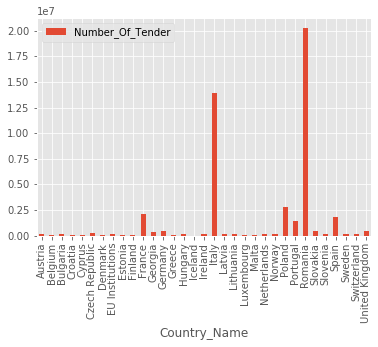

In [3]:
A=Web_Scarpping('https://opentender.eu')
A.scrapper()    